# Classical Machine Learning Model

These models try to fit a constrained function to your data. Better for smaller datasets, simpler tasks.


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt # for plotting

# scikit-learn (sklearn) is a very important library for classical machine learning
from sklearn.datasets import make_moons # the type of dataset we'll be making
from sklearn.model_selection import train_test_split, cross_val_score # splitting into train and test datasets
from sklearn.preprocessing import StandardScaler # Scaling data
from sklearn.ensemble import RandomForestClassifier # Random Forest Model
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.svm import SVC # Support Vector Machine Model
from sklearn.metrics import accuracy_score, classification_report # Evaluation
from sklearn.inspection import DecisionBoundaryDisplay # Visualization
from sklearn.pipeline import make_pipeline

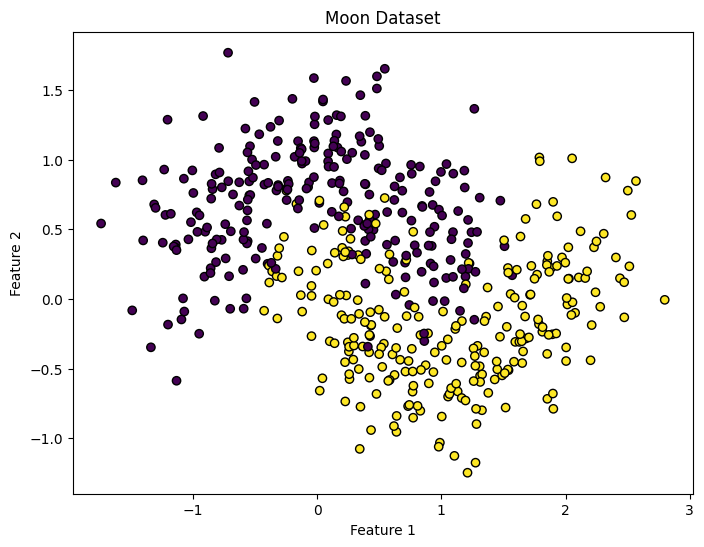

In [3]:
# Generate a two moons dataset
# X --> Inputs
# y --> labels
# X, y is standard notation
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# Split the dataset into training and testing sets
# A test set is held out to see if a model has overfit or underfit
# We set a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='black')
plt.title('Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
# Initialize and train the models
# It's often hard to predict which models will be best. Usually something like a RandomForest will be better than a basic decision tree, but there are many factors like how the data is structured and the dataset size.
models = {
    'Random Forest': make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100)),
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression()),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVC(kernel='rbf'))
}

for name, model in models.items():
    model.fit(X_train, y_train)

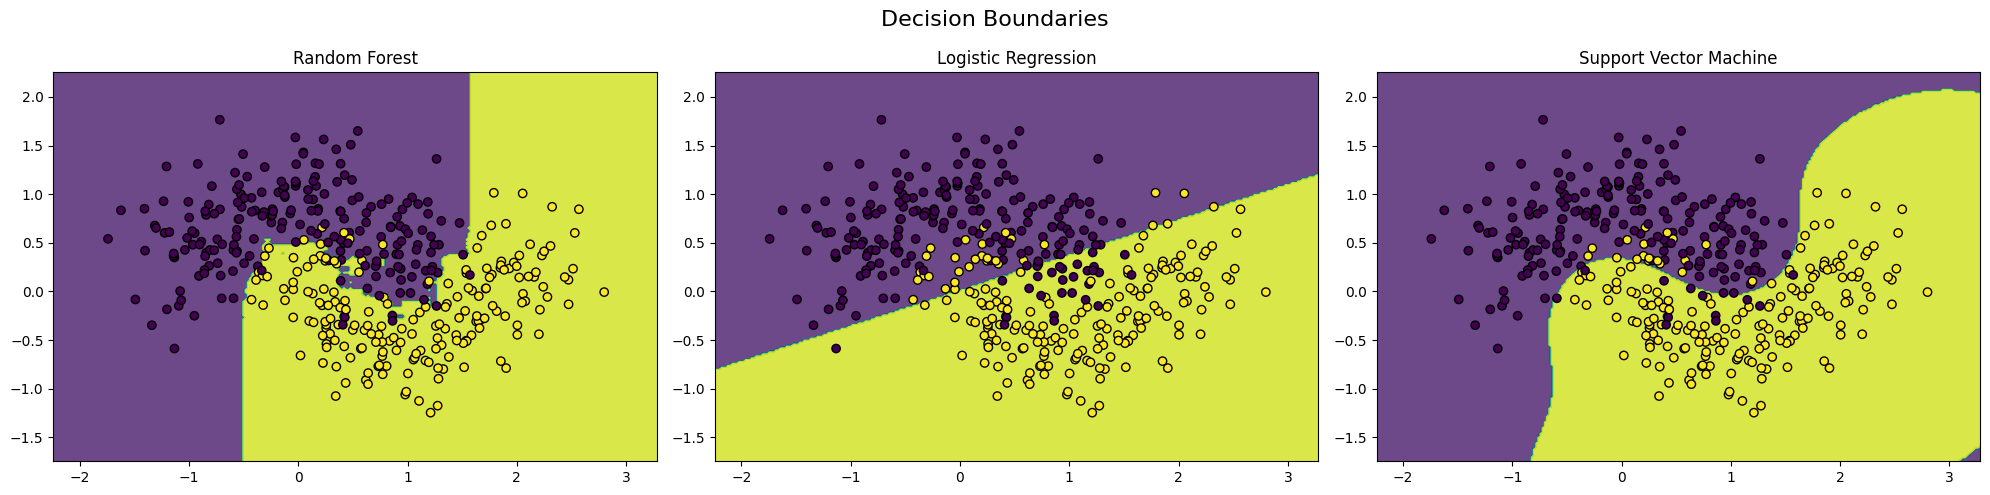

In [5]:
# Visualize decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Decision Boundaries', fontsize=16)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
mesh_points = np.c_[xx.ravel(), yy.ravel()]

for ax, (name, model) in zip(axes, models.items()):
    # Predict on the mesh grid
    Z = model.predict(mesh_points).reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

    # Plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='black')
    ax.set_title(name)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

In [7]:
# Evaluate the models
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    # print("Classification Report:")
    # print(classification_report(y_test, y_pred))


Random Forest Results:
Accuracy: 0.8800

Logistic Regression Results:
Accuracy: 0.8500

Support Vector Machine Results:
Accuracy: 0.8500


In [8]:
# CROSS VALIDATION
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=6, scoring='accuracy')
    cv_results[name] = scores
    print(f"\n{name} Cross-Validation Results:")
    print(f"Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Random Forest Cross-Validation Results:
Mean Accuracy: 0.9101 (+/- 0.0713)

Logistic Regression Cross-Validation Results:
Mean Accuracy: 0.8425 (+/- 0.0768)

Support Vector Machine Cross-Validation Results:
Mean Accuracy: 0.9051 (+/- 0.0749)


# Deep Learning Model

These models use layers of artificial 'neurons' connected to each other.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17064346.88it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 474716.15it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4308448.51it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6038202.46it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [11]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [12]:
model = SimpleModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

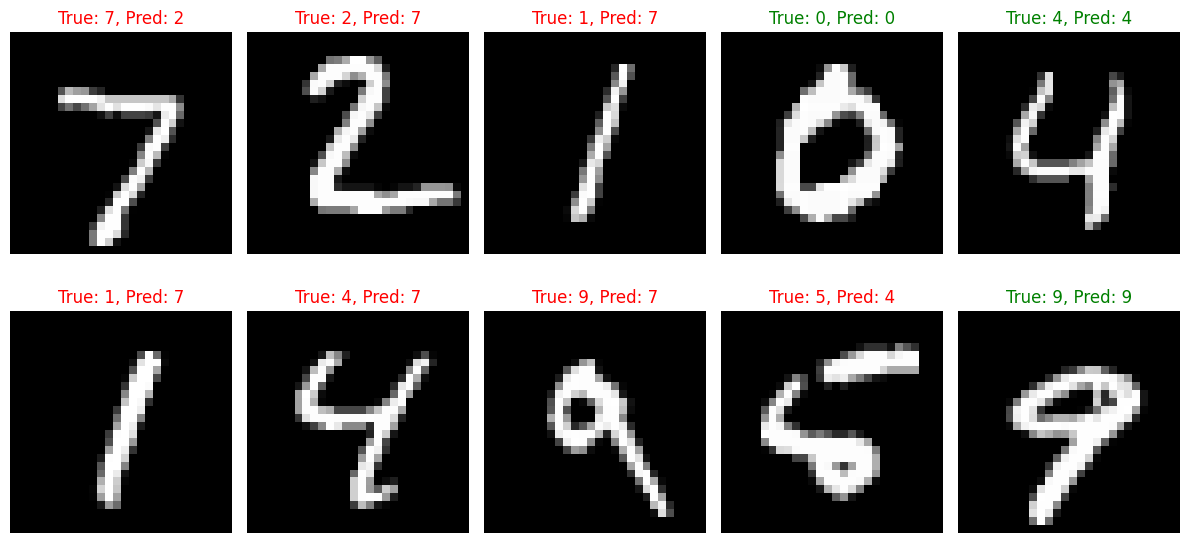

In [14]:
def visualize_results(model, test_loader):
    model.eval()
    images, labels = next(iter(test_loader))
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i][0], cmap='gray')

        true_label = labels[i].item()
        pred_label = predicted[i].item()

        # Set color based on prediction correctness
        color = 'green' if true_label == pred_label else 'red'

        ax.set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

visualize_results(model, test_loader)

In [17]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Calculate average loss for the epoch
    avg_loss = total_loss / len(train_loader)

    # Print at the end of each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}')

Epoch 1/5, Average Loss: 0.0370
Epoch 2/5, Average Loss: 0.0292
Epoch 3/5, Average Loss: 0.0241
Epoch 4/5, Average Loss: 0.0192
Epoch 5/5, Average Loss: 0.0154


Test Loss: 0.0689
Test Accuracy: 97.98%


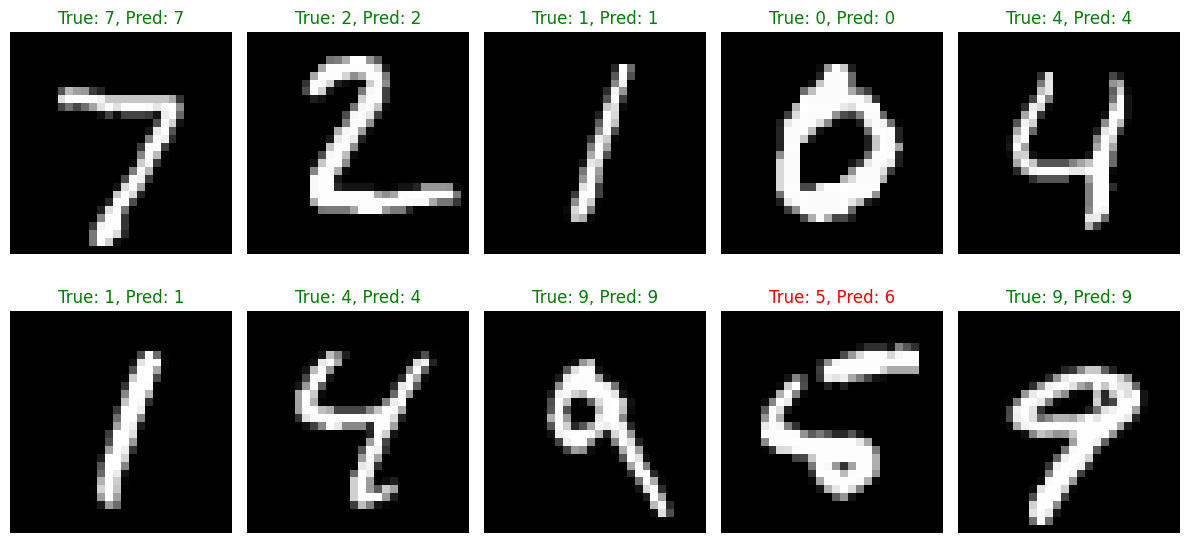

In [18]:
model.eval()
test_loss = 0
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

average_test_loss = test_loss / len(test_loader)
accuracy = 100 * correct / total
print(f'Test Loss: {average_test_loss:.4f}')
print(f'Test Accuracy: {accuracy:.2f}%')

visualize_results(model, test_loader)